In [1]:
# Import libraries
from math import ceil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('titanic_data.csv')

# Initial exploration
print("Initial dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nData types and missing values:")
print(df.info())
print("\nSummary statistics:")
print(df.describe(include='all'))

Initial dataset shape: (889, 15)

First 5 rows:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 15 columns):
 #   Column       Non-Null Count  

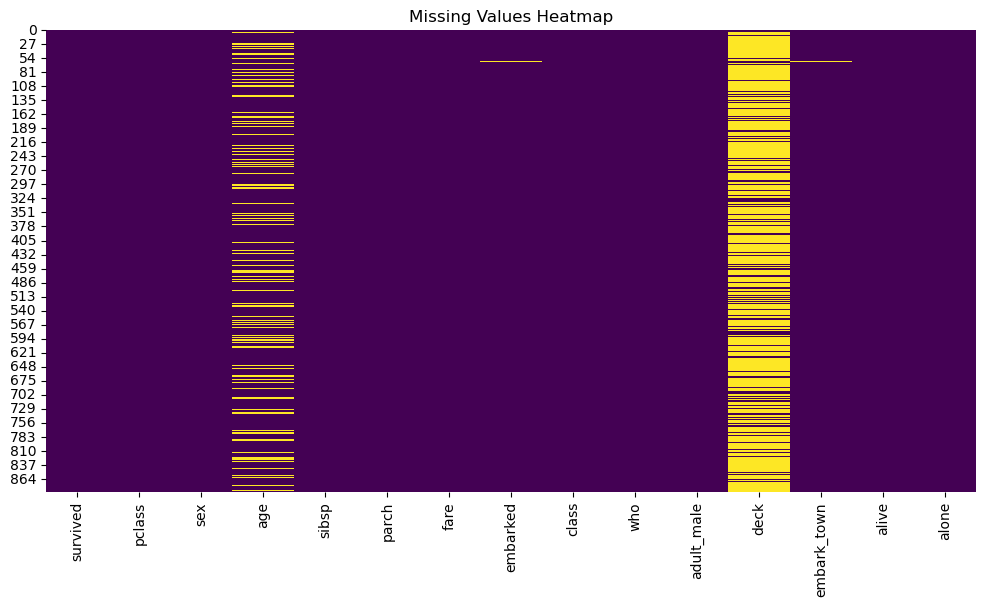

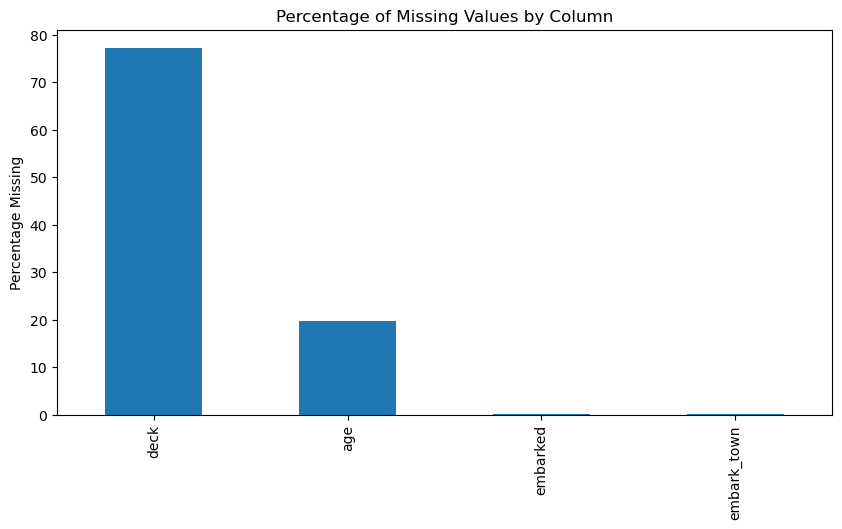


Missing values after handling:
survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64


In [2]:

# -----------------------------------------------
# 1. Handling Missing Values
# -----------------------------------------------

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Calculate percentage of missing values
missing_percent = df.isnull().sum() / len(df) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 5))
missing_percent.plot(kind='bar')
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percentage Missing')
plt.show()

# Handle missing values
# Fill Age - based on Pclass (and Who if exists)
if 'who' in df.columns:
    df['age'] = df.groupby(['pclass', 'who'])['age'].transform(lambda x: x.fillna(x.median()))
else:
    df['age'] = df.groupby('pclass')['age'].transform(lambda x: x.fillna(x.median()))

# Fill Embarked
if 'embarked' in df.columns:
    df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Fill Fare
df['fare'] = df.groupby('pclass')['fare'].transform(lambda x: x.fillna(x.median()))

# Drop columns with too many missing values
for col in ['deck', 'embark_town']:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)

# Verify no more missing values
print("\nMissing values after handling:")
print(df.isnull().sum())


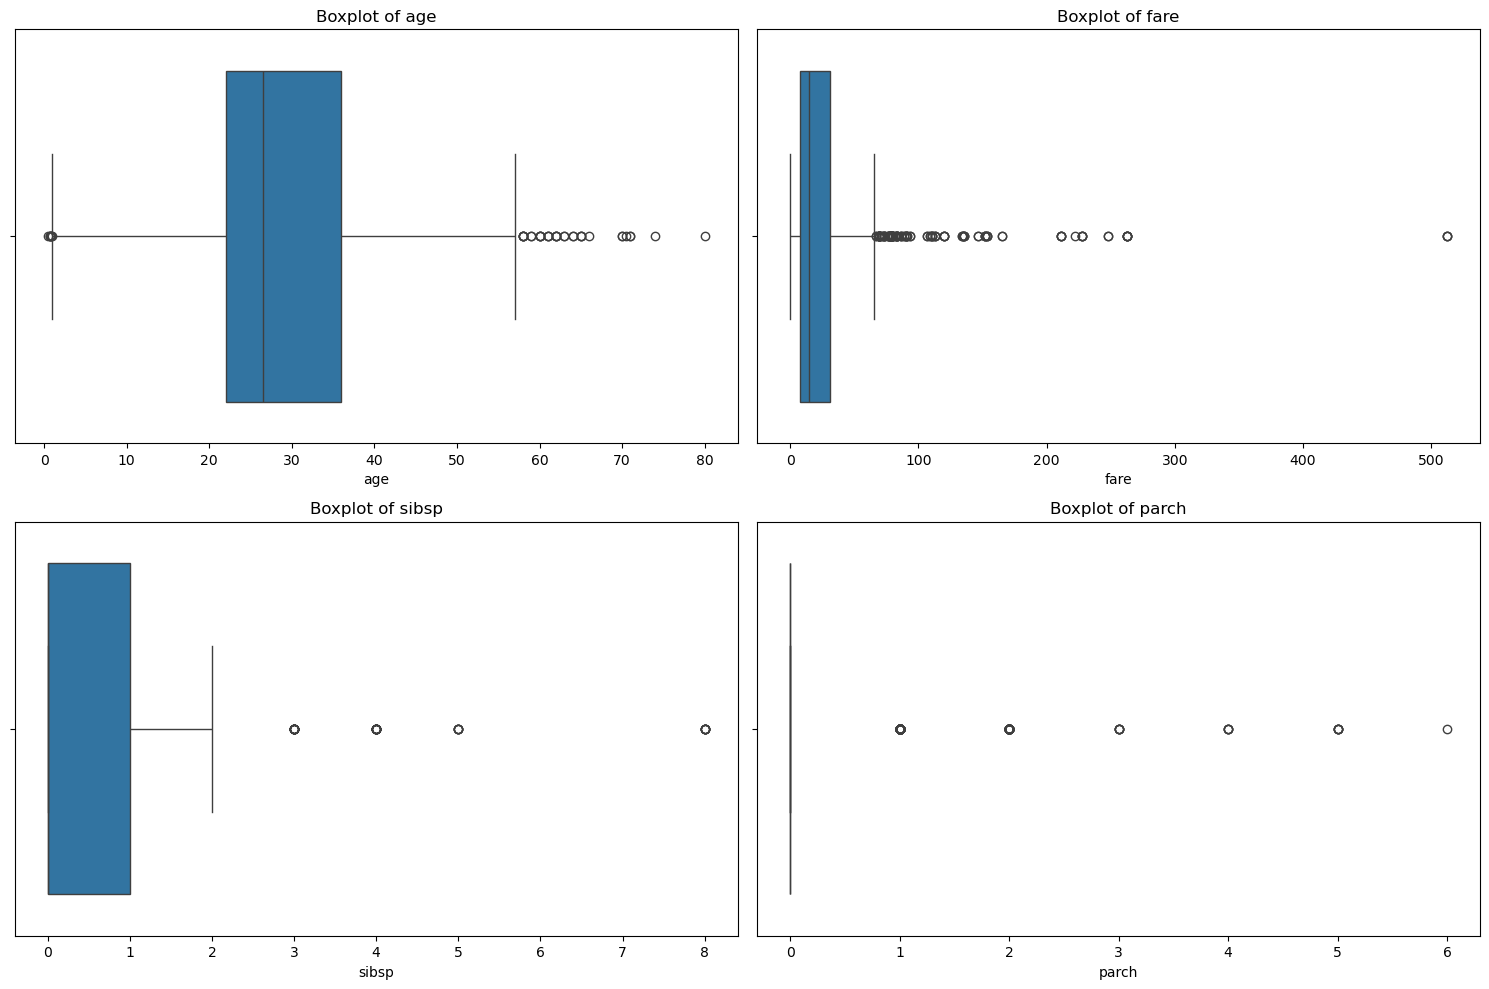

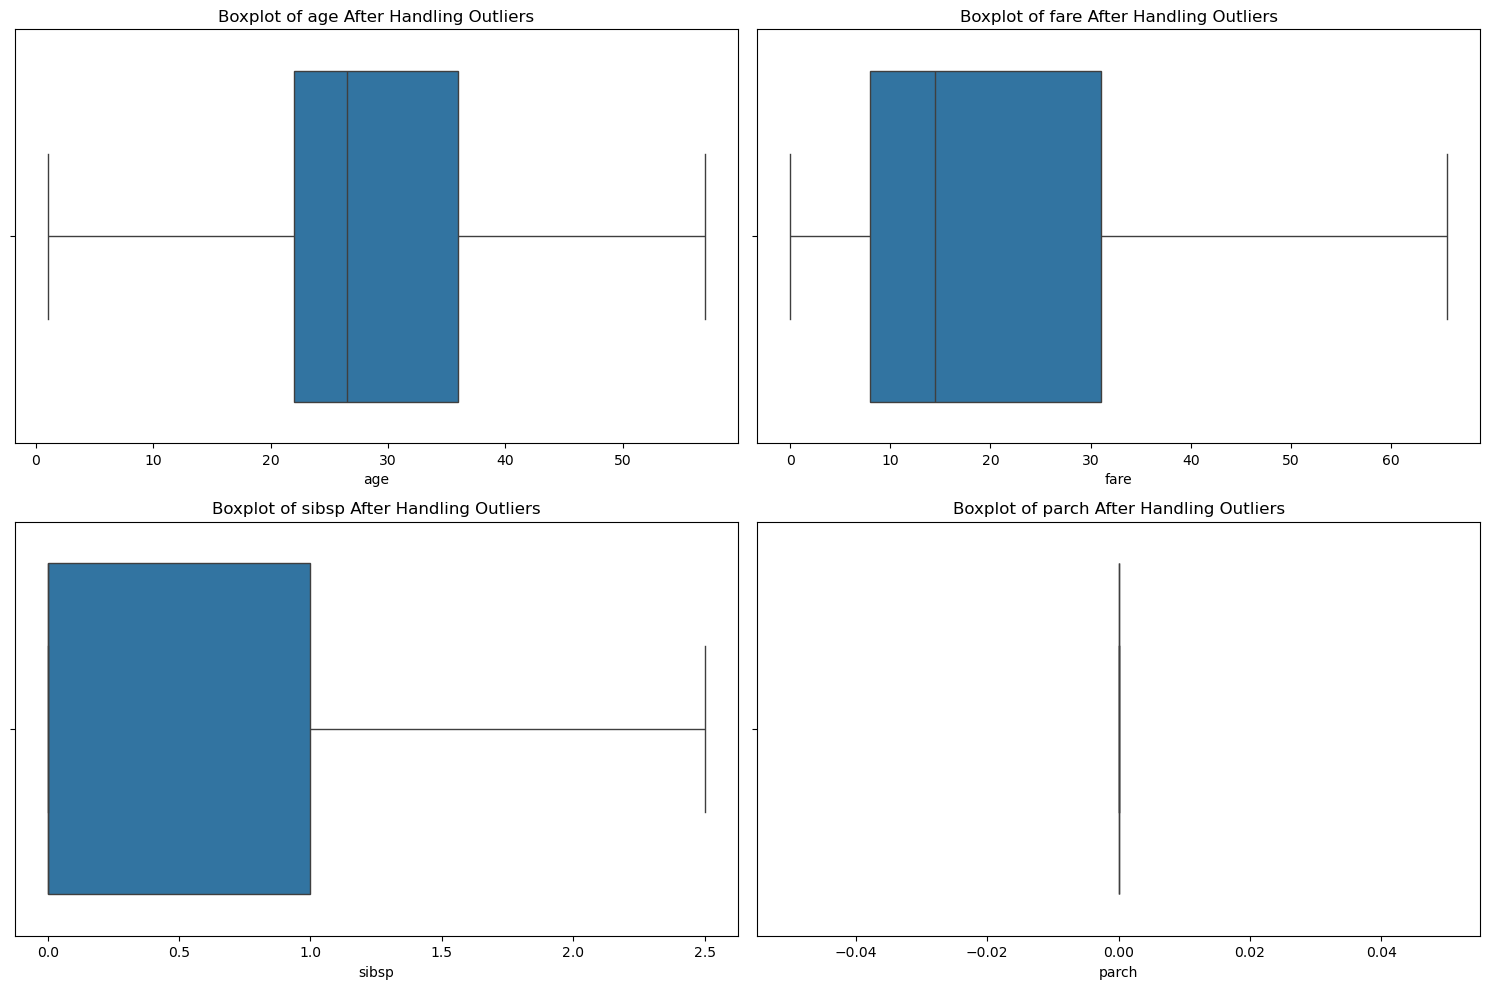

In [3]:

# -----------------------------------------------
# 2. Identifying and Removing Outliers
# -----------------------------------------------

# Visualize numerical columns for outliers
num_cols = ['age', 'fare', 'sibsp', 'parch']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Removing Outliers From Numerical Columns
for i, col in enumerate(num_cols):
    # Handle outliers in Fare
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])



# Visualize after handling Fare outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} After Handling Outliers')
plt.tight_layout()
plt.show()


In [4]:

# -----------------------------------------------
# 3. Checking and Removing Duplicates
# -----------------------------------------------

# Check for duplicates
print("\nNumber of duplicates:", df.duplicated().sum())
print(df.shape)

# Remove duplicates
df.drop_duplicates(inplace= True)
print("Shape after removing duplicates:", df.shape)



Number of duplicates: 128
(889, 13)
Shape after removing duplicates: (761, 13)


Data type before Encoding:
survived        int64
pclass          int64
sex            object
age           float64
sibsp         float64
parch         float64
fare          float64
embarked       object
class          object
who            object
adult_male       bool
alive          object
alone            bool
dtype: object

Data type after Encoding:
survived        int64
pclass          int64
sex             int32
age           float64
sibsp         float64
parch         float64
fare          float64
embarked        int32
class           int32
who             int32
adult_male       bool
alive           int32
alone            bool
dtype: object


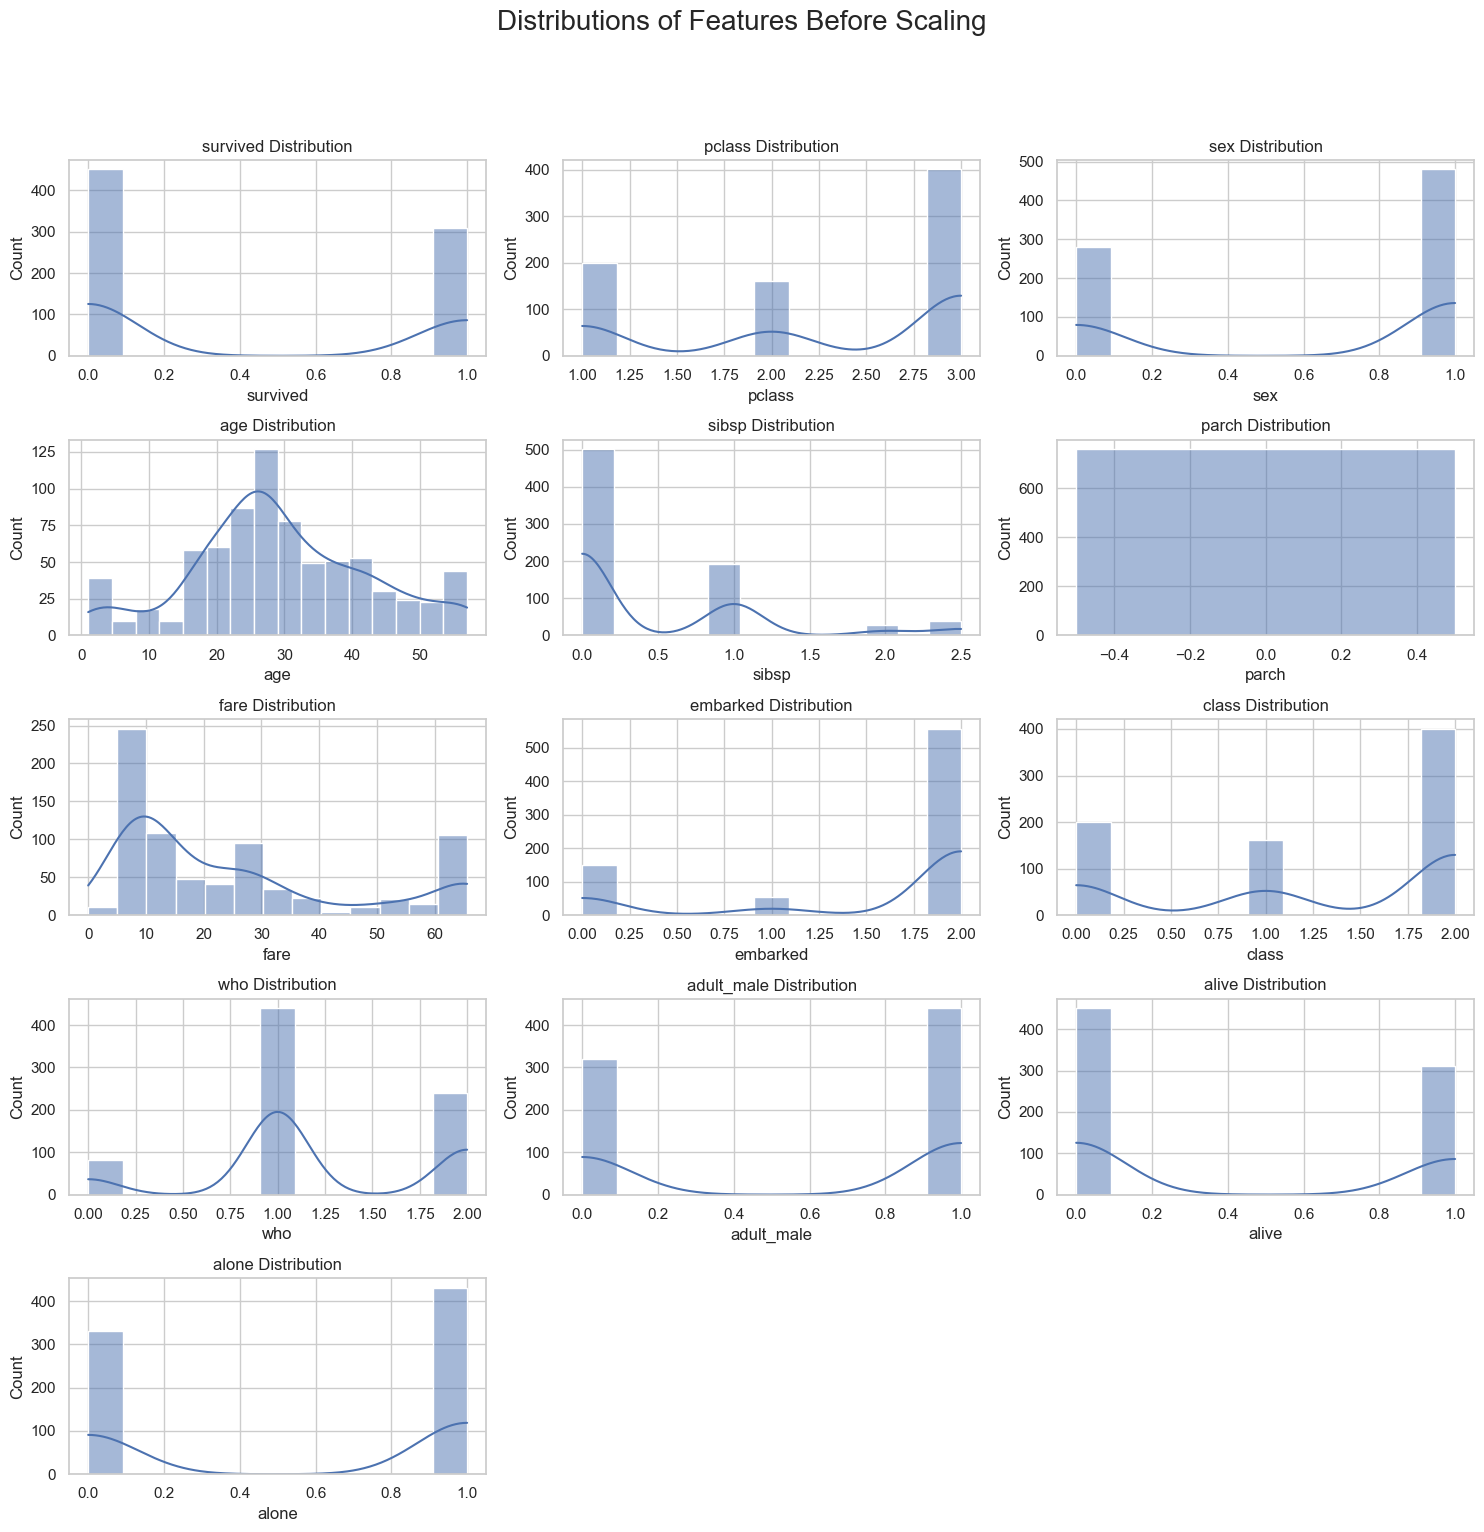

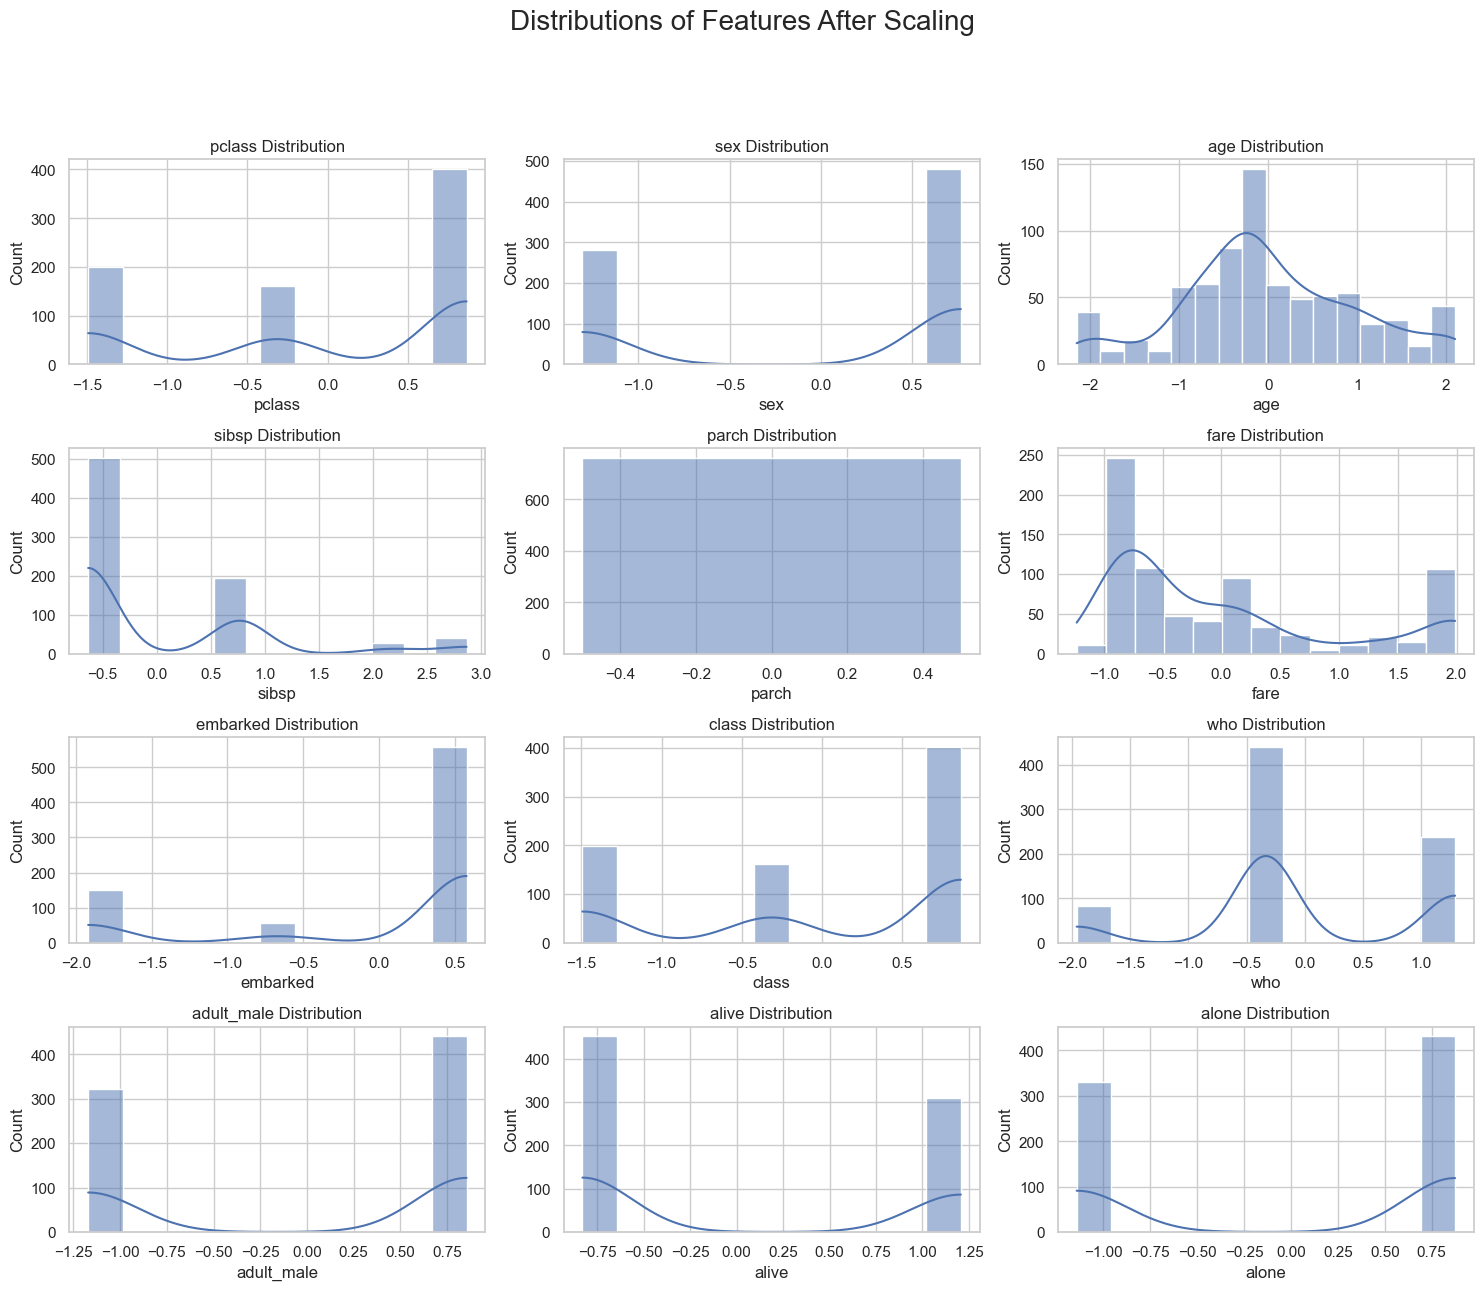

     pclass       sex       age     sibsp  parch      fare  embarked  \
0  0.866905  0.765125 -0.558323  0.765705    0.0 -0.875215  0.579700   
1 -1.493434 -1.306976  0.656281  0.765705    0.0  1.986874 -1.919745   
2  0.866905 -1.306976 -0.254672 -0.633338    0.0 -0.842114  0.579700   
3 -1.493434 -1.306976  0.428543  0.765705    0.0  1.373263  0.579700   
4  0.866905  0.765125  0.428543 -0.633338    0.0 -0.835984  0.579700   

      class       who  adult_male     alive     alone  survived  
0  0.866905 -0.335005    0.854134 -0.829073 -1.142830         0  
1 -1.493434  1.288811   -1.170776  1.206167 -1.142830         1  
2  0.866905  1.288811   -1.170776  1.206167  0.875021         1  
3 -1.493434  1.288811   -1.170776  1.206167 -1.142830         1  
4  0.866905 -0.335005    0.854134 -0.829073  0.875021         0  
(761, 13)


In [5]:
# Convert object and categorical data to float
encoded = df.copy()
print(f'Data type before Encoding:\n{encoded.dtypes}')

le = LabelEncoder()
for col in encoded.select_dtypes(include= ['object', 'category']).columns:
    encoded[col] = le.fit_transform(encoded[col])

print(f'\nData type after Encoding:\n{encoded.dtypes}')

# Visualize distributions before scaling
cols_count = len(encoded.columns)
rows = ceil(cols_count / 3)
sns.set_theme(style="whitegrid")

plt.figure(figsize= (15, rows * 3))
plt.suptitle('Distributions of Features Before Scaling', fontsize= 20, y= 1.02)
for i, col in enumerate(encoded, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(encoded[col], kde= True)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.subplots_adjust(top= 0.92)

X = encoded.drop(columns=['survived'])       # this has been modified from here
y = encoded['survived']                      

scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(X), columns= X.columns)


# Visualize distributions after scaling
plt.figure(figsize=(15, rows * 3))
plt.suptitle('Distributions of Features After Scaling', fontsize= 20, y= 1.02)
for i, col in enumerate(x_scaled, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(x_scaled[col], kde=True)
    plt.title(f'{col} Distribution')

plt.tight_layout()
plt.subplots_adjust(top= 0.92)
plt.show()

processed_data = x_scaled.copy()
processed_data['survived'] = y.values

print(processed_data.head())
print(processed_data.shape)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import streamlit as st

# Assuming processed_data already exists

x = processed_data.drop(columns=['survived'])
y = processed_data['survived']

# Streamlit part  (model selection)
st.title("Model Selector: Logistic Regression vs SVM")

model_choice = st.selectbox("Choose a model:", ["Logistic Regression", "SVM"])
train_method = st.radio("Choose evaluation method:", ["Train-Test Split", "KFold Cross-Validation"])

# Initialize model based on selection
if model_choice == "Logistic Regression":
    model = LogisticRegression()
elif model_choice == "SVM":
    model = SVC(kernel='rbf')

# Train and Evaluate
if train_method == "Train-Test Split":
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Train the model
    model.fit(x_train, y_train)

    # Predict
    y_pred = model.predict(x_test)

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=False)

    # Display in Streamlit
    st.subheader("Evaluation Results (Train-Test Split)")
    st.write(f"**Accuracy:** {accuracy:.2f}")
    st.write("**Confusion Matrix:**")
    st.write(cm)
    st.write("**Classification Report:**")
    st.text(report)

elif train_method == "KFold Cross-Validation":
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cross_val_results = cross_val_score(model, x, y, cv=kf, scoring='accuracy')

    # Display in Streamlit
    st.subheader("Evaluation Results (K-Fold Cross-Validation)")
    st.write("**Cross-validation accuracy scores:**", cross_val_results)
    st.write(f"**Mean Accuracy:** {cross_val_results.mean():.2f}")

2025-05-05 15:52:14.002 
  command:

    streamlit run c:\Users\Ahmed Shamh\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-05-05 15:52:14.004 Session state does not function when running a script without `streamlit run`
